In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'C:\Users\HP\Downloads\Project\OnlineRetail.csv', encoding='ISO-8859-1')


# Display the first few rows of the dataset
print(df.head())

# Display basic information about the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo   

In [4]:
# Remove rows with missing CustomerID or Invoice
df = df.dropna(subset=['CustomerID'])

# Remove negative quantities (if applicable)
df = df[df['Quantity'] > 0]

# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [6]:
# Calculate total sales
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

In [7]:
# Total sales
total_sales = df['TotalSales'].sum()
print(f'Total Sales: {total_sales}')

# Unique customers
unique_customers = df['CustomerID'].nunique()
print(f'Unique Customers: {unique_customers}')

# Top 10 products by total sales
top_products = df.groupby('Description')['TotalSales'].sum().nlargest(10)
print("Top 10 Products by Total Sales:")
print(top_products)

# Sales by country
sales_by_country = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)
print("Sales by Country:")
print(sales_by_country)

Total Sales: 8911407.904
Unique Customers: 4339
Top 10 Products by Total Sales:
Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68844.33
ASSORTED COLOUR BIRD ORNAMENT          56580.34
Manual                                 53779.93
RABBIT NIGHT LIGHT                     51346.20
Name: TotalSales, dtype: float64
Sales by Country:
Country
United Kingdom          7308391.554
Netherlands              285446.340
EIRE                     265545.900
Germany                  228867.140
France                   209024.050
Australia                138521.310
Spain                     61577.110
Switzerland               56443.950
Belgium                   41196.340
Sweden                    38378.330
Japan    

In [8]:
# Create RFM table
current_date = df['InvoiceDate'].max() + pd.DateOffset(days=1)
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSales': 'sum'
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalSales': 'Monetary'
})

# Display the RFM table
print(rfm.head())

            Recency  Frequency  Monetary
CustomerID                              
12346.0         326          1  77183.60
12347.0           2        182   4310.00
12348.0          75         31   1797.24
12349.0          19         73   1757.55
12350.0         310         17    334.40


In [13]:
# Calculate RFMScore
rfm['RFMScore'] = (rfm['Frequency'] * 2) + (rfm['Monetary'] * 0.1) - (rfm['Recency'] * 0.5)

In [14]:
# Define RFM segmentation function
def rfm_segment(df):
    if df['Recency'] <= 30 and df['Frequency'] > 5 and df['Monetary'] > 100:
        return 'High Value'
    elif df['Recency'] <= 60 and df['Frequency'] > 3 and df['Monetary'] > 50:
        return 'Medium Value'
    else:
        return 'Low Value'

# Apply segmentation
rfm['Segment'] = rfm.apply(rfm_segment, axis=1)

# Display segmented customers
print(rfm['Segment'].value_counts())

Low Value       1991
High Value      1587
Medium Value     761
Name: Segment, dtype: int64


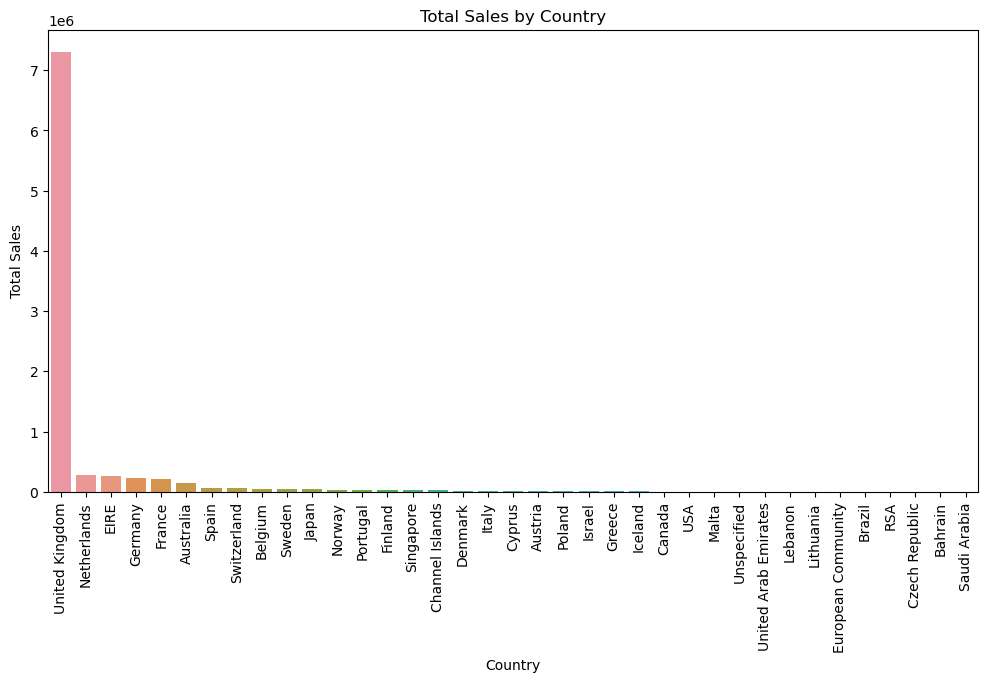

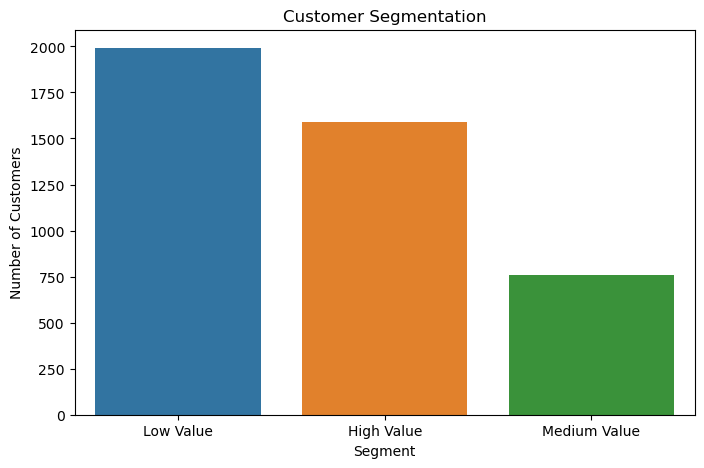

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sales by country
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_country.index, y=sales_by_country.values)
plt.xticks(rotation=90)
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()

# Plot RFM segments
plt.figure(figsize=(8, 5))
sns.countplot(x='Segment', data=rfm)
plt.title('Customer Segmentation')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.show()